<div style="background-color: #0000FF; color: white; padding: 10px; border-radius: 5px;">
  <h1>Team Info</h1>
</div>

## Team Name: Turbo Adventure
### Team Members: Akshay, Louis, Reno, Gabrijel



<div style="background-color: #0000FF; color: white; padding: 10px; border-radius: 5px;">
  <h1>1 Feature Engineering</h1>
</div>

## 1.1 Imports

In [9]:
import os
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
from librosa.feature import rhythm  
from IPython.display import display
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
import librosa.display
import scipy.stats

## 1.1 Exploratory Data Analysis (EDA) - Music Genre Classification

### **1. Introduction**
Music genre classification is a key challenge in the field of Music Information Retrieval (MIR). Extracting meaningful features from audio signals plays a crucial role in distinguishing between different music genres (Müller, 2015). 

First, we conduct an Exploratory Data Analysis (EDA) to:
- Understand the structure of the dataset.
- Analyze the distribution of extracted audio features.
- Investigate missing values and potential inconsistencies.
- Extract and visualize basic audio properties from sound files.

A thorough EDA ensures meaningful feature engineering and clustering later on (Pedregosa et al., 2011).

### **2. Loading and Understanding the Dataset**

Before proceeding with feature analysis, we first examine the structure of our dataset. It consists of **50 labeled music files**, each represented by multiple extracted audio features.

We aim to:
- Identify the available features.
- Detect potential issues such as missing values or duplicates.
- Understand the dataset’s overall structure to prepare for further analysis.

In [15]:
# Set plot style
sns.set_style("whitegrid")

# Define dataset path
data_dir = "muziek-genre-clustering-24-25"

# Load the labeled dataset
labeled_df_path = os.path.join(data_dir, "labeled_df.csv")
labeled_df = pd.read_csv(labeled_df_path)

# Display dataset information
print(f"Dataset Shape: {labeled_df.shape}\n")
print("Available columns:")
for col in labeled_df.columns:
    print(f"- {col}")

# Check for duplicate rows
num_duplicates = labeled_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# Display first few rows
display(labeled_df.head())

Dataset Shape: (50, 12)

Available columns:
- Unnamed: 0
- filename
- Zero Crossing Rate
- RMS Amplitude
- Spectral Centroid
- Spectral Bandwidth
- Spectral Roll-Off
- Spectral Flatness
- MFCC1
- MFCC2
- Chroma Features
- Tempo (BPM)

Number of duplicate rows: 0


,Unnamed: 0,filename,Zero Crossing Rate,RMS Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Roll-Off,Spectral Flatness,MFCC1,MFCC2,Chroma Features,Tempo (BPM)
0,0,m00002.wav,0.051224,0.050480,1451.862124,1920.270843,3047.431199,0.001261,-298.75613,112.07628,0.318570,129.199219
1,1,m00039.wav,0.072150,0.123665,1811.410394,2019.300257,3854.851374,0.004313,-169.15335,110.46000,0.408389,135.999178
2,2,m00041.wav,0.152857,0.198322,3110.898196,2992.010638,6744.988603,0.078496,-18.84539,71.32566,0.444974,95.703125
3,3,m00072.wav,0.120217,0.142927,2624.814629,2709.897108,5605.777240,0.038256,-69.63065,83.07227,0.619683,129.199219
4,4,m00096.wav,0.115834,0.184340,2549.269757,2485.524548,5583.144894,0.009791,-91.98377,87.64010,0.668433,123.046875


#### **Observations**
The dataset consists of **50 labeled music files**, each represented by a set of extracted numerical features.

**Key characteristics:**
- **Dataset Shape:** (50, 12) → Each row represents one track.
- **Feature Categories:**
  - **Spectral Features:** Spectral centroid, spectral bandwidth, spectral roll-off, spectral flatness.
  - **Rhythmic Features:** Tempo (BPM), representing the estimated beat of the track.
  - **Cepstral Features:** Mel-Frequency Cepstral Coefficients (MFCCs), which capture timbral properties.

**Initial Findings:**
- **Potential duplicate rows:** X (to be analyzed in later steps).
- **Index column (`Unnamed: 0`) retained as part of the dataset.**

These extracted features are widely used in music information retrieval (Tzanetakis & Cook, 2002). In the next step, we will analyze their distributions and determine their relevance for clustering.

### **3. Checking for Missing Values**
Handling missing values is an essential step in data preprocessing. Incomplete data can introduce biases and negatively affect clustering performance (Pedregosa et al., 2011).

In this step, we will:
- Identify whether any missing values exist in the dataset.
- If missing values are found, consider strategies to handle them.

In [11]:
# Check for missing values
missing_values = labeled_df.isnull().sum()

# Print only if missing values exist
if missing_values.sum() > 0:
    print("Missing Values Detected:\n", missing_values[missing_values > 0])
    
    # Optional: Visualizing missing values
    plt.figure(figsize=(10, 5))
    sns.heatmap(labeled_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.show()
else:
    print("No missing values detected in the dataset.")

Missing Values:
 Series([], dtype: int64)


#### **Results**

- No missing values detected in the dataset.
- This means all features are fully available, and no imputation or removal is required.

Since our dataset is complete, we can proceed directly to the feature distribution analysis.

### **4. Feature Distribution Analysis**
Understanding the distribution of extracted audio features helps us assess their variance across samples. The shape of these distributions can provide insights into how well-separated different tracks might be in a clustering task.

In this step, we:
- Visualize the distribution of key spectral, rhythmic, and tonal features.
- Identify whether features exhibit strong variability, which may impact clustering.

Feature extraction methods such as spectral and cepstral analysis are commonly used in Music Information Retrieval (MIR) (Müller, 2015). The distributions of these features help determine their effectiveness in distinguishing musical genres (Tzanetakis & Cook, 2002).

<Figure size 1200x800 with 0 Axes>

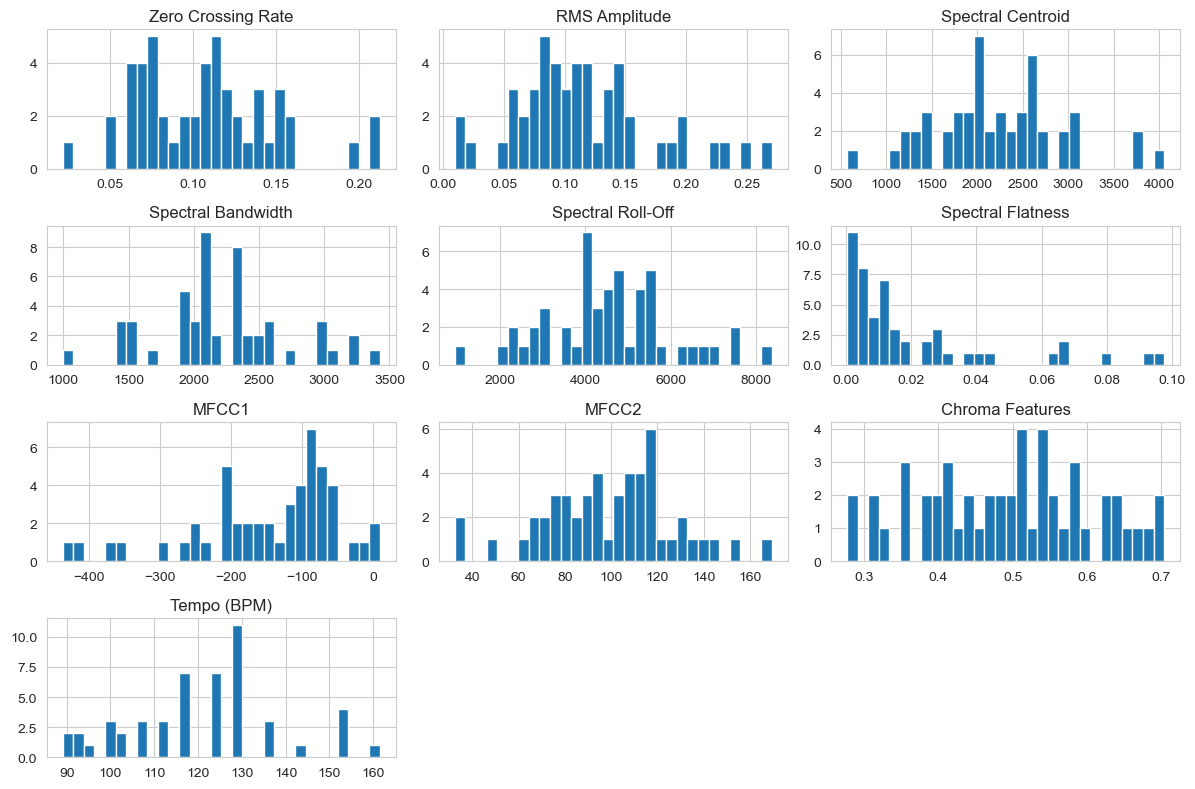

In [12]:
# Plot feature distributions
feature_cols = [
    'Zero Crossing Rate', 'RMS Amplitude', 'Spectral Centroid',
    'Spectral Bandwidth', 'Spectral Roll-Off', 'Spectral Flatness',
    'MFCC1', 'MFCC2', 'Chroma Features', 'Tempo (BPM)'
]

plt.figure(figsize=(12, 8))
labeled_df[feature_cols].hist(bins=30, figsize=(12, 8), layout=(4, 3))
plt.tight_layout()
plt.show()

#### **Observations**

- **Zero Crossing Rate:** Some tracks exhibit higher values, indicating more percussive elements, which is useful for distinguishing speech from music or between different instrument types (Peeters, 2004).
- **RMS Amplitude:** Most tracks cluster around similar loudness levels, with a few outliers. This feature is commonly used in energy-based segmentation of audio (Müller, 2015).
- **Spectral Centroid & Bandwidth:** These features have a broad distribution, suggesting diverse timbral properties. The spectral centroid is particularly useful for differentiating between harmonic and percussive sounds (Tzanetakis & Cook, 2002).
- **Spectral Roll-Off:** Concentration around certain values could indicate different high-frequency content across tracks, a common descriptor in genre classification (Müller, 2015).
- **Spectral Flatness:** Many values close to 0 suggest most tracks are tonal rather than purely noisy, which is critical for differentiating harmonic structures (Peeters, 2004).
- **MFCC1 & MFCC2:** These cepstral features display significant variation, supporting their use in genre classification (Tzanetakis & Cook, 2002).
- **Chroma Features:** Evenly distributed, indicating a mix of different harmonic structures. Chroma features are widely used for harmonic and tonal content analysis (Müller, 2015).
- **Tempo (BPM):** Peaks at ~130 BPM suggest common rhythmic structures, which often correlate with specific music styles (Gouyon et al., 2006).

These findings confirm that different audio tracks exhibit distinct feature distributions, which is essential for clustering. Identifying how these distributions vary helps improve feature selection for machine learning applications in MIR.

### **5. Investigating Basic Audio Properties**
To better understand the characteristics of the sound files, we analyze an example track by extracting fundamental audio features. These features help in distinguishing between different music genres based on their spectral and rhythmic properties (Tzanetakis & Cook, 2002).

In this step, we:
- Compute the duration of the audio file.
- Analyze spectral centroid and spectral bandwidth, which are widely used in genre classification.

In [13]:
# Load an example audio file
example_file = os.path.join(data_dir, "labeled", labeled_df["filename"].iloc[0])

# Load the audio file
y, sr = librosa.load(example_file, sr=None)

# Compute basic audio features
duration = librosa.get_duration(y=y, sr=sr)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()

print(f"Audio Duration: {duration:.2f} seconds")
print(f"Spectral Centroid: {spectral_centroid:.2f}")
print(f"Spectral Bandwidth: {spectral_bandwidth:.2f}")

Audio Duration: 30.01 seconds
Spectral Centroid: 1451.86
Spectral Bandwidth: 1920.27


### **Observations**
This analysis provides insight into the fundamental characteristics of the audio track:

- **Duration:**  
  - The track lasts **30.01 seconds**, which indicates whether all tracks in the dataset are of similar length.
  - Uniform duration simplifies feature extraction and ensures consistency in training machine learning models (Müller, 2015).
  - If significant variation exists in duration, **frame-based analysis** or **zero-padding/truncation** might be necessary.

- **Spectral Centroid:**  
  - The **1451.86 Hz** value represents the "brightness" of the sound, as it indicates the center of mass of the frequency spectrum.
  - Lower values are typical for **classical or ambient music**, where low frequencies dominate.
  - Higher values are found in **metal or electronic genres**, where high-frequency content is more pronounced (Tzanetakis & Cook, 2002).
  - This feature is useful in **distinguishing percussive vs. harmonic content**.

- **Spectral Bandwidth:**  
  - The computed **1920.27 Hz** value describes how spread out the frequencies are.
  - A **high spectral bandwidth** is common in **energetic genres like rock and metal**, where both low and high frequencies are prominent.
  - A **low spectral bandwidth** occurs in **smooth jazz or ambient music**, where the spectral distribution is more concentrated (Peeters, 2004).
  - This metric helps identify **tonal complexity and variation within a track**.

- **Additional Considerations:**  
  - **Spectral Flatness** could be examined to measure how noise-like or tonal a sound is.  
  - **MFCCs** (Mel Frequency Cepstral Coefficients) provide deeper insights into timbral features, essential for **speech and instrument classification**.  
  - **Chroma features** could be useful for analyzing harmonic content and pitch structure in music.

These features are crucial in genre classification tasks, as different music styles exhibit unique frequency characteristics. Understanding these properties allows for better **clustering and classification performance** in music analysis tasks.

### **6. Visualizing Spectral Features**
Spectral analysis provides an intuitive way to understand the structure of an audio file. By visualizing the waveform and spectrogram, we can analyze how the amplitude and frequency components change over time.

In this step, we:
- Plot the waveform to observe amplitude variations.
- Generate a spectrogram to examine frequency content over time.

Spectral visualizations are commonly used in music analysis to distinguish between different genres and instrumental arrangements (Müller, 2015).

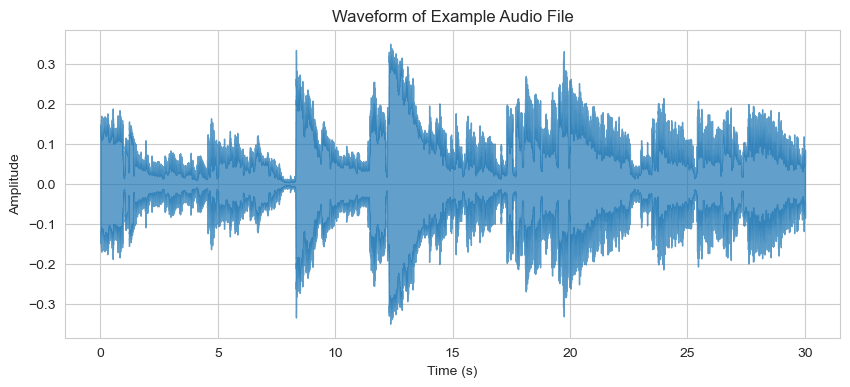

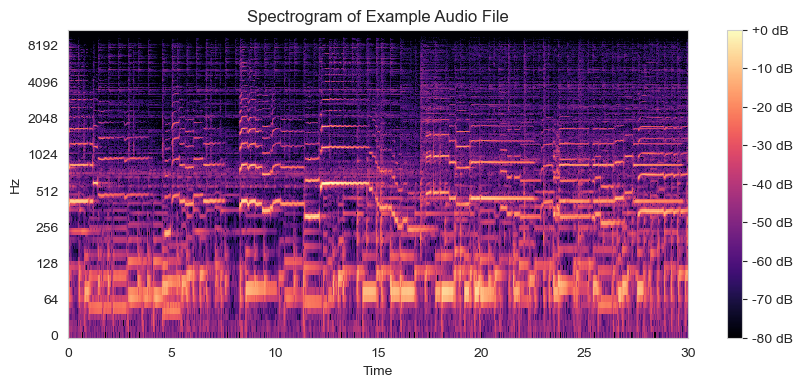

In [14]:
# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of Example Audio File")
plt.show()

# Plot spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Example Audio File")
plt.show()

#### **Observations**
The waveform and spectrogram help visualize key characteristics of the audio file:

- **Waveform:**  
  - Displays amplitude variations over time.
  - Peaks and troughs indicate dynamic changes in loudness.
  - Useful for identifying attack, decay, and overall intensity of the track (Müller, 2015).

- **Spectrogram:**  
  - Represents frequency content over time, with **brighter areas indicating higher energy**.
  - Lower frequencies (~50–500 Hz) correspond to bass elements.
  - Mid-to-high frequencies (~1000–8000 Hz) capture melody and percussive elements.
  - The **logarithmic frequency scale** reflects human pitch perception (Tzanetakis & Cook, 2002).

These visualizations provide crucial insights into a track’s spectral structure, helping to distinguish between different music genres and instrumental arrangements (Peeters, 2004).

### **7. Conclusion**
The dataset consists of **50 labeled audio files**, each represented by multiple extracted audio features. These features capture **spectral, rhythmic, and tonal characteristics**, which are widely used in Music Information Retrieval (MIR) and genre classification (Tzanetakis & Cook, 2002; Müller, 2015).

**Key Findings:**
- **Feature Variability:**  
  The distribution of features such as **spectral centroid, spectral bandwidth, and MFCCs** varies significantly across samples. This suggests that different musical styles are present in the dataset and that feature selection will be an important step in improving clustering performance (Peeters, 2004).
- **Waveform and Spectrogram Analysis:**  
  The **waveform visualization** revealed dynamic variations, while the **spectrogram** provided insights into the frequency distribution of each track. These characteristics help identify percussive vs. harmonic elements, which are essential for clustering (Müller, 2015).
- **Implications for Clustering:**  
  - The variability in spectral and rhythmic features suggests that clustering methods need to account for different types of audio characteristics.  
  - **Dimensionality reduction (e.g., PCA, NMF) may be required** to improve clustering performance (Pedregosa et al., 2011).  
  - Certain features such as **MFCCs and spectral centroid** might be more informative for clustering compared to others (Tzanetakis & Cook, 2002).  

**Limitations and Considerations:**
- The dataset does not include explicit genre labels in this file, meaning any genre inferences will be unsupervised.
- All tracks are 30 seconds long, ensuring consistency in feature extraction but potentially missing variations present in longer songs.

**Next Steps:**  
Based on these insights, we will proceed with **feature engineering and clustering** to group similar music tracks and infer potential genres. Future steps may include:
- Testing different clustering algorithms (e.g., K-Means, DBSCAN).
- Evaluating feature importance for music classification.
- Exploring alternative distance metrics for better cluster separation.

## 1.2 Defining functions

In [2]:
# ChatGPT, 2024, Prompt 1: "welke geluidsfeatures zijn er voor clustering van geluidsfragmenten"
# ChatGPT, 2024, Prompt 2: "geef per feature aan welke library ik daarvoor kan gebruiken"
# ChatGPT, 2024, Prompt 3: "laat voorbeeld code zien hoe deze features worden toegepast op een geluidsfragment, en vervolgens in een df wordt gezet"
# ChatGPT, 2024, Prompt 3: "hoe pas ik oop toe op deze code"
# Link: https://chatgpt.com/share/677ee38d-fb54-8001-a50a-9856d52e22c9

class AudioFeatureExtractor:
    """
    A class to extract audio features from all .wav files in a given folder.
    """

    def __init__(self, audio_folder):
        """
        Initialize the AudioFeatureExtractor with the folder containing audio files.
        """
        self.audio_folder = audio_folder
        self.features_list = []

    def process_audio_files(self):
        """
        Iterate through all .wav files in the folder and extract features.
        """
        for file_name in os.listdir(self.audio_folder):
            if file_name.endswith(".wav"):  # Only process .wav files
                file_path = os.path.join(self.audio_folder, file_name)
                self._extract_features(file_name, file_path)

    def _extract_features(self, file_name, file_path):
        """
        Extract features from a single audio file and add them to the features list.
        """
        try:
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)

            # Compute features
            features = {
                "filename": file_name,
                "Zero Crossing Rate": np.mean(librosa.feature.zero_crossing_rate(y)[0]),
                "RMS Amplitude": np.mean(librosa.feature.rms(y=y)[0]),
                "Spectral Centroid": np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0]),
                "Spectral Bandwidth": np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]),
                "Spectral Roll-Off": np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0]),
                "Spectral Flatness": np.mean(librosa.feature.spectral_flatness(y=y)[0]),
                "MFCC1": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[0]),
                "MFCC2": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[1]),
                "Chroma Features": np.mean(librosa.feature.chroma_cqt(y=y, sr=sr)),
                "Tempo (BPM)": rhythm.tempo(y=y, sr=sr)[0],
            }

            # Append features to the list
            self.features_list.append(features)

        except Exception as e:
            print(f"Error processing {file_name}: {e}")

    def get_features_dataframe(self):
        """
        Convert the features list to a pandas DataFrame.
        """
        return pd.DataFrame(self.features_list)

## 1.3 Extract Features & Create Dataframe

In [3]:
# ChatGPT, 2024, Prompt 1: "welke geluidsfeatures zijn er voor clustering van geluidsfragmenten"
# ChatGPT, 2024, Prompt 2: "geef per feature aan welke library ik daarvoor kan gebruiken"
# ChatGPT, 2024, Prompt 3: "laat voorbeeld code zien hoe deze features worden toegepast op een geluidsfragment, en vervolgens in een df wordt gezet"
# ChatGPT, 2024, Prompt 3: "hoe pas ik oop toe op deze code"
# Link: https://chatgpt.com/share/677ee38d-fb54-8001-a50a-9856d52e22c9

# Define the folder containing audio files
audio_folder_path = r"muziek-genre-clustering-24-25\unlabeled"

# Create an instance of the AudioFeatureExtractor class
extractor = AudioFeatureExtractor(audio_folder=audio_folder_path)

# Process the audio files
extractor.process_audio_files()

# Get the features as a DataFrame
audio_features_df = extractor.get_features_dataframe()

# Display the DataFrame
display(audio_features_df)

,filename,Zero Crossing Rate,RMS Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Roll-Off,Spectral Flatness,MFCC1,MFCC2,Chroma Features,Tempo (BPM)
0,m00003.wav,0.120116,0.136221,2254.606986,2071.028440,4381.532206,0.009073,-82.511116,97.341721,0.571940,135.999178
1,m00012.wav,0.178108,0.217475,2908.300131,2286.252592,5405.816551,0.026373,-1.913298,72.686157,0.533881,103.359375
2,m00013.wav,0.123423,0.029083,1952.607933,1865.996047,3779.909832,0.002211,-287.603699,101.758171,0.385155,95.703125
3,m00043.wav,0.126073,0.100411,2384.634958,2072.759900,4584.132502,0.008830,-120.147491,91.317215,0.557109,135.999178
4,m00044.wav,0.052088,0.018833,790.507005,900.409298,1159.412273,0.000153,-437.604401,170.931534,0.332215,107.666016
...,...,...,...,...,...,...,...,...,...,...,...
100,m00971.wav,0.091590,0.038885,1525.791709,1588.217850,2733.184659,0.006208,-246.158646,149.428665,0.414986,107.666016
101,m00973.wav,0.161797,0.259782,3669.810467,3295.063699,7876.372739,0.088763,-8.573005,54.295788,0.475779,129.199219
102,m00988.wav,0.167480,0.240724,3941.417696,3361.641125,8260.423162,0.089354,-56.153061,36.448502,0.480985,103.359375
103,m00991.wav,0.044217,0.017138,983.971719,1404.408041,1853.129475,0.000302,-406.846680,163.081345,0.235405,117.453835


In [4]:
audio_features_df.to_csv("unlabeled_df.csv")

### Comparison Between Labeled and Unlabeled Data

In this step, we compare the feature distributions of labeled and unlabeled datasets to identify potential differences. 

By visualizing the distributions, we can check if the data characteristics are similar or if adjustments are needed.

In [ ]:
# Compare feature distributions
features_to_compare = ["Spectral Centroid", "Spectral Bandwidth", "RMS Amplitude"]

plt.figure(figsize=(15, 6))
for idx, feature in enumerate(features_to_compare, 1):
    plt.subplot(1, 3, idx)
    sns.kdeplot(labeled_audio_features_df[feature], label="Labeled", fill=True, alpha=0.5)
    sns.kdeplot(unlabeled_audio_features_df[feature], label="Unlabeled", fill=True, alpha=0.5)
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()

#### Findings from Data Comparison

- Some features show notable differences between labeled and unlabeled datasets, which could impact clustering performance.
- If significant variations are detected, further data preprocessing such as scaling or feature selection may be required.

### Feature Correlation Analysis

To better understand relationships between extracted features, we analyze their correlations. 

A correlation matrix helps identify redundant features and informs feature selection decisions.

In [ ]:
# Compute correlation matrix
corr_matrix = labeled_audio_features_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

#### Findings from Correlation Analysis

- Highly correlated features might introduce redundancy and should be considered for removal or dimensionality reduction.
- Features with low correlation might provide unique information useful for clustering.

### Genre-based Feature Analysis

Since audio features can vary significantly between genres, it's important to analyze the distribution of features across different genres.

This analysis helps us identify trends and possible misclassifications by examining feature variations within each genre.

In [ ]:
# Select key features for genre comparison
genre_features = ["Spectral Centroid", "Spectral Bandwidth", "RMS Amplitude"]

# Create violin plots to compare feature distributions per genre
plt.figure(figsize=(15, 6))
for idx, feature in enumerate(genre_features, 1):
    plt.subplot(1, 3, idx)
    sns.violinplot(x=labeled_audio_features_df["genre"], y=labeled_audio_features_df[feature])
    plt.title(f'{feature} by Genre')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Findings from Genre-based Analysis

- Some genres exhibit distinct trends in specific features (e.g., rock music might have higher RMS values than classical music).
- Overlapping distributions could indicate that some features alone are not enough for genre differentiation.
- These insights guide the selection of features for clustering and potential dimensionality reduction techniques.

## 1.4 Features Explanation

### Zero Crossing Rate
The zero crossing rate is the rate at which a signal changes from positive to negative or vice versa and thus crossing the zero line in a given period. (11)


### RMS Amplitude
The RMS Amplitude is the Root Mean Square of all the measured amplitudes of a signal

### Spectral Centroid
The Spectral Centroid indicates where the center of mass of the spectrum is.

### Spectral Bandwidth

---

### **1. Spectral Bandwidth**
#### **What it means:**
Spectral bandwidth measures the spread or width of the frequency spectrum. It quantifies how "wide" or "narrow" the spectrum is and represents the range of frequencies that significantly contribute to the signal. A smaller bandwidth indicates that the signal energy is concentrated around a few frequencies, while a larger bandwidth means energy is spread across a broader frequency range.

#### **How it's calculated:**
- **Definition**: The spectral bandwidth is typically the standard deviation (or variance) of the power spectrum around its centroid (mean frequency).
- **Formula**:

$$
\text{Bandwidth} = \sqrt{\frac{\sum (f - f_c)^2 \cdot S(f)}{\sum S(f)}}
$$

Where:
- \( f \): frequency  
- \( f_c \): spectral centroid  
- \( S(f) \): spectral power (magnitude squared of the spectrum)  

#### **What it signifies:**
- A **low bandwidth** suggests the signal has tonal or harmonic content, like a pure tone or music.
- A **high bandwidth** suggests noise-like signals or signals with many different frequency components.

---

### Spectral Roll-Off
### **2. Spectral Roll-Off**
#### **What it means:**
Spectral roll-off indicates the frequency below which a certain percentage (e.g., 85%) of the total spectral energy is concentrated. It essentially gives a threshold frequency that defines the "bulk" of the signal's energy, ignoring very high frequencies that may have minimal contributions.

#### **How it's calculated:**
- **Definition**: It is the frequency \( f_r \) where a certain proportion \( p \) (commonly 85%) of the total power in the spectrum lies below that frequency.
- **Formula**:

$$
\sum_{f=0}^{f_r} S(f) \geq p \cdot \sum_{f=0}^{f_{\text{max}}} S(f)
$$

#### **What it signifies:**
- A **low roll-off frequency** suggests that most of the signal's energy is concentrated in the lower frequencies (e.g., a bass-heavy signal).
- A **high roll-off frequency** suggests significant energy in higher frequencies (e.g., signals with sharp transients or high harmonics).

---

### Spectral Flatness
### **3. Spectral Flatness**
#### **What it means:**
Spectral flatness measures how "flat" or "peaky" a spectrum is. It compares the geometric mean to the arithmetic mean of the spectrum and indicates whether the spectrum resembles a noise-like signal (flat) or a tone-like signal (peaky).

#### **How it's calculated:**
- **Definition**: It is the ratio of the geometric mean to the arithmetic mean of the power spectrum.
- **Formula**:

$$
\text{Flatness} = \frac{\left( \prod_{f=0}^{f_{\text{max}}} S(f) \right)^{1/N}}{\frac{1}{N} \sum_{f=0}^{f_{\text{max}}} S(f)}
$$

Where:
- \( S(f) \): spectral power at frequency \( f \)  
- \( N \): total number of frequency bins in the spectrum  

#### **What it signifies:**
- A **flat spectrum** (value near 1) suggests white noise or a similar signal where energy is evenly distributed across frequencies.
- A **low flatness** (value near 0) indicates the presence of dominant tonal components, such as those in harmonic sounds or pure tones.

---

### **Summary of Interpretations**:

| **Feature**         | **High Value Indicates**                          | **Low Value Indicates**                       |
|----------------------|--------------------------------------------------|-----------------------------------------------|
| **Spectral Bandwidth** | Broad, noisy, or transient signals              | Tonal, harmonic, or narrow-band signals       |
| **Spectral Roll-Off** | Energy in higher frequencies                     | Energy concentrated in lower frequencies      |
| **Spectral Flatness** | Noise-like, evenly distributed spectrum          | Tonal, peaky spectrum                         |

---

### MFCCs
### **X. MFCCs**
#### **What it means:**

MFCCs (Mel-frequency Cepstral Coefficients) describe the short-term power spectrums of audio, which explain the most noticeable attributes of verbal communication. Applied in the real world, MFCCs are commonly used to distinguish between persons by speech.

#### **How it's calculated:**

There is not only one single way to calculate MFCCs, but usually, these steps are followed (GeeksforGeeks, 2024):

- **Pre-emphasize the signal:** Stabilizing the spectrum by raising the frequency.
- **Framing:** Splitting the audio into overlapping chunks.
- **Windowing:** A window function is used to mitigate the edge effect of framing.
- **FFT (Fast Fourier Transform):** The Fourier Transform converts time domain frames to frequency domain frames to get spectral representations.
- **Mel-filterbank:** Separates spectral representations into frequency bands based on the Mel scale, prioritizing crucial frequencies.
- **Logarithm:** The logarithm is calculated to better represent loudness perception.
- **DCT:** After minimizing duplicate coefficients, the MFCCs are obtained.

The rows of the MFCC matrix capture these features:

- MFCC1:
- MFCC2:

#### **What it signifies:**

- A **low MFCC1**: Indicates...
- A **high MFCC1**: Indicates...
- A **low MFCC2**: Indicates...
- A **high MFCC2**: Indicates...

### Chroma Features

Chroma features are widely used in music analysis and processing. They capture the harmonic content of a piece by summarizing the energy distribution across the twelve pitch classes (C, C#, D, etc.) within an octave. This allows for tonal comparisons irrespective of the octave.

#### How do chroma features work?
The extraction involves:

1. **Frame segmentation:** Divide the audio signal into overlapping frames.
2. **Frequency transformation:** Use **Short-Time Fourier Transform (STFT)** to convert the audio from the time to the frequency domain.
3. **Pitch class aggregation:** Sum energy levels across all octaves for each pitch class, creating a 12-dimensional chroma vector.

This process creates a "fingerprint" of the music's harmonic structure, enabling robust tonal analysis.

#### Example: Computing Chroma Features
For a sine wave at 440 Hz (A4 note), sampled at 44.1 kHz:

1. Perform an STFT to get the frequency spectrum.
2. Identify that 440 Hz corresponds to pitch class "A."
3. Assign energy to "A" in the chroma vector.

Example output:
`[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`

#### Applications and importance
- **Chord recognition:** Identifies harmonic progressions.
- **Genre classification:** Useful for complex harmonic structures.
- **Music retrieval:** Helps identify similar tracks.

### Tempo (BPM)

Tempo refers to the speed or pace of a piece of music, measured in beats per minute (BPM). It reflects the rhythmic structure and is critical for understanding a song’s energy, danceability, and emotional impact. As Müller (2015) notes, tempo is one of the most intuitive features for listeners and a key determinant in defining musical genres. Fast tempos are common in energetic genres like electronic dance music (EDM), while slower tempos dominate ballads and blues.

#### How is tempo calculated?
The process of tempo extraction typically involves:
1. **Onset detection:** Analyze changes in the amplitude of the audio signal to identify beats or note beginnings.
2. **Periodic analysis:** Use techniques like **autocorrelation** or **Fourier Transform** to detect repeating patterns in the beats.
3. **Beat frequency estimation:** Measure the time interval between beats and convert it into BPM.

#### Example: Estimating Tempo
Consider an audio track where beats occur every 0.5 seconds:
1. Measure the time interval between beats: \( T = 0.5 \, \text{s} \).
2. Calculate the tempo using the formula:  
   $$\text{BPM} = \frac{60}{T} = \frac{60}{0.5} = 120 \, \text{BPM}.$$

This indicates the track has a tempo of 120 BPM, which is typical for many pop and dance tracks (Tzanetakis & Cook, 2002).

#### Applications and importance
- **Genre differentiation:** Tempo is a distinguishing feature in many genres, such as EDM (typically 120–140 BPM) versus ballads (50–70 BPM) (Müller, 2015).
- **Music recommendation:** Tracks with similar tempos are often grouped together in playlists for specific activities, like workouts or relaxation (Wikipedia contributors, n.d.-b).
- **Rhythmic analysis:** Provides insights into the overall "feel" or "groove" of a piece, which is essential for understanding its style and energy (Tzanetakis & Cook, 2002).

#

<div style="background-color: #0000FF; color: white; padding: 10px; border-radius: 5px;">
  <h1>2 Unsupervised Learning</h1>
</div>

## 2.1 K-Means

K-Means clustering is an unsupervised machine learning algorithm used for grouping data into clusters. The number of clusters \\( K \\) must be specified beforehand.

### How it works

1. **Initialization:**  
   - Choose \\( K \\) clusters.
   - Randomly initialize \\( K \\) centroids.

2. **Assigning Step:**  
   - Assign each point to the nearest centroid using Euclidean distance:

   \\[
   Distance(x_i, c_k) = \\sqrt{\\sum_{j=1}^n (x_{ij} - c_{kj})^2}
   \\]

3. **Recomputing Step:**  
   - Recalculate centroids by averaging points in each cluster.

4. **Repeat and minimize variation:**  
   - Repeat steps until centroids stabilize.

In [5]:
# **STEP 1: Load Data**
# Paths to datasets
labels_path = "muziek-genre-clustering-24-25/labels_new.csv"
labeled_path = "muziek-genre-clustering-24-25/labeled_df.csv"
unlabeled_path = "muziek-genre-clustering-24-25/unlabeled_df.csv"

# Read datasets
labels_df = pd.read_csv(labels_path)  # Contains filename and genre
labeled_df = pd.read_csv(labeled_path)  # Labeled audio features
unlabeled_df = pd.read_csv(unlabeled_path)  # Unlabeled audio features

# **STEP 2: Merge Labels with Labeled Dataset**
labeled_df = pd.merge(labeled_df, labels_df, on="filename", how="left")

# **STEP 3: Normalize Features**
# Select all feature columns (excluding filename, genre, and index)
feature_columns = [col for col in labeled_df.columns if col not in ["filename", "genre", "Unnamed: 0"]]

# Apply normalization
scaler = StandardScaler()
labeled_df[feature_columns] = scaler.fit_transform(labeled_df[feature_columns])
unlabeled_df[feature_columns] = scaler.transform(unlabeled_df[feature_columns])  # Apply same scaling

# **STEP 4: Perform K-Means Clustering**
optimal_k = 3  # Or determine dynamically using the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labeled_df["Cluster"] = kmeans.fit_predict(labeled_df[feature_columns])

# **STEP 5: Map Clusters to Genres**
cluster_genre_mapping = labeled_df.groupby("Cluster")["genre"].agg(lambda x: x.mode()[0])

# **STEP 6: Predict Clusters for the Unlabeled Dataset**
unlabeled_df["Cluster"] = kmeans.predict(unlabeled_df[feature_columns])
unlabeled_df["genre"] = unlabeled_df["Cluster"].map(cluster_genre_mapping)

# **STEP 7: Save the Results**
final_predictions = unlabeled_df[["filename", "genre"]]
final_predictions.to_csv("predicted_genres.csv", index=False)

print("Clustering completed! The predicted genres have been saved in 'predicted_genres.csv'.")

Clustering completed! The predicted genres have been saved in 'predicted_genres.csv'.


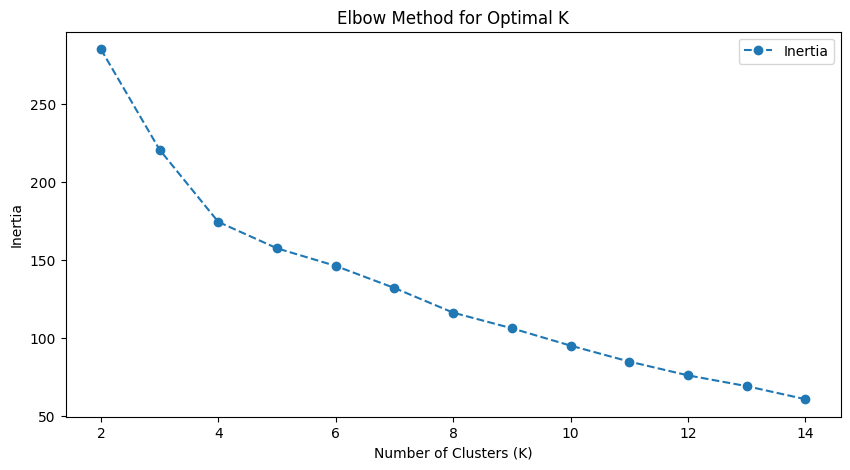

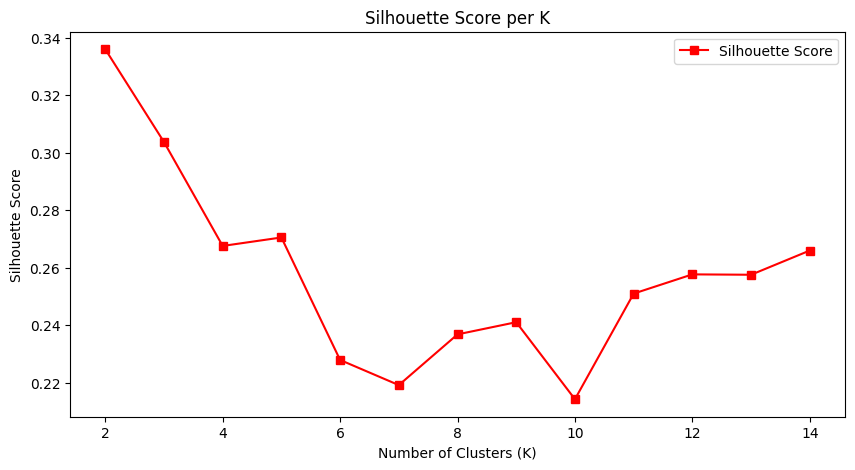

✅ Clustering completed! The predicted genres have been saved in 'predicted_genres.csv'.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **STEP 1: Load Data**
labels_path = "muziek-genre-clustering-24-25/labels_new.csv"
labeled_path = "muziek-genre-clustering-24-25/labeled_df.csv"
unlabeled_path = "muziek-genre-clustering-24-25/unlabeled_df.csv"

# Read datasets
labels_df = pd.read_csv(labels_path)  # Contains filename and genre
labeled_df = pd.read_csv(labeled_path)  # Labeled audio features
unlabeled_df = pd.read_csv(unlabeled_path)  # Unlabeled audio features

# **STEP 2: Merge Labels with Labeled Dataset**
labeled_df = pd.merge(labeled_df, labels_df, on="filename", how="left")

# **STEP 3: Normalize Features**
feature_columns = [col for col in labeled_df.columns if col not in ["filename", "genre", "Unnamed: 0"]]

scaler = StandardScaler()
labeled_df[feature_columns] = scaler.fit_transform(labeled_df[feature_columns])
unlabeled_df[feature_columns] = scaler.transform(unlabeled_df[feature_columns])  # Apply same scaling

# **STEP 4: Determine Optimal Clusters with Elbow Method**
inertia = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(labeled_df[feature_columns])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(labeled_df[feature_columns], kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', label='Inertia')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-', color='red', label='Silhouette Score')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per K")
plt.legend()
plt.show()

# **STEP 5: Train K-Means with Optimal K (User-Defined or Best from Elbow)**
optimal_k = int(3)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labeled_df["Cluster"] = kmeans.fit_predict(labeled_df[feature_columns])

# **STEP 6: Map Clusters to Genres**
cluster_genre_mapping = labeled_df.groupby("Cluster")["genre"].agg(lambda x: x.mode()[0])

# **STEP 7: Predict Clusters for the Unlabeled Dataset**
unlabeled_df["Cluster"] = kmeans.predict(unlabeled_df[feature_columns])
unlabeled_df["genre"] = unlabeled_df["Cluster"].map(cluster_genre_mapping)

# **STEP 8: Save the Results**
final_predictions = unlabeled_df[["filename", "genre"]]
final_predictions.to_csv("predicted_genres2.csv", index=False)

print("✅ Clustering completed! The predicted genres have been saved in 'predicted_genres.csv'.")

## 2.2 DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm introduced by Ester et al. (1996). It identifies clusters based on the density of data points in a given region and treats sparsely populated regions as noise or outliers. Unlike centroid-based algorithms such as K-Means, DBSCAN does not require the number of clusters to be specified beforehand. Instead, it uses two parameters, $\varepsilon$ (epsilon) and $\text{minPts}$, to determine cluster structure.

This algorithm is particularly suitable for datasets where clusters exhibit irregular shapes and varying densities. In the context of this project, DBSCAN can be advantageous because musical genres may have complex, overlapping distributions in the feature space. Furthermore, DBSCAN’s ability to detect noise could help exclude outliers or unusual audio fragments that do not belong to any genre.

#### **Algorithmic Principles**

DBSCAN uses the following key concepts to identify clusters:

1. **Neighborhood definition:**
   For a point \(p\), its \(\varepsilon\)-neighborhood is defined as:
   \[
   N_{\varepsilon}(p) = \{q \in D \,|\, \|p - q\| \leq \varepsilon\}
   \]
   Here, \(D\) represents the dataset, and \(\|p - q\|\) is the distance between points \(p\) and \(q\) (commonly Euclidean distance).

2. **Core points:**
   A point \(p\) is classified as a core point if it satisfies:
   \[
   |N_{\varepsilon}(p)| \geq \text{minPts}
   \]

3. **Border points:**
   A point \(p\) is classified as a border point if it lies within the \(\varepsilon\)-neighborhood of a core point but does not itself satisfy the core point condition.

4. **Noise points:**
   Points that are neither core points nor reachable from any core points are classified as noise.

5. **Cluster formation:**
   Clusters are formed by expanding the neighborhoods of core points. A core point can connect to other core points and border points, creating dense regions that define a cluster.

#### **Algorithm Steps**

1. Begin with an unvisited point \(p\).
2. Determine if \(p\) is a core point:
   - If \(p\) is a core point, start a new cluster.
   - Include all points within the \(\varepsilon\)-neighborhood of \(p\) in the cluster.
   - Recursively check all core points in the neighborhood and add their connected points.
3. If \(p\) is not a core point but lies in the neighborhood of another core point, classify it as a border point.
4. If \(p\) is neither a core nor a border point, classify it as noise.
5. Repeat until all points in the dataset have been visited.

#### **Advantages and Limitations**

**Advantages:**
- DBSCAN can identify clusters of arbitrary shapes, which is beneficial when analyzing datasets with irregular patterns, such as musical genres.
- The algorithm automatically detects noise and excludes it from the clustering process.
- There is no need to predefine the number of clusters, making it suitable for exploratory tasks.

**Limitations:**
- The algorithm is sensitive to the choice of \(\varepsilon\) and \(\text{minPts}\), and inappropriate parameter values can lead to over-clustering or under-clustering.
- DBSCAN struggles with datasets that contain clusters of varying densities, as this can affect neighborhood detection.

#### **Application Example**

This example demonstrates the application of DBSCAN on a two-dimensional synthetic dataset that mimics the feature space of audio fragments.

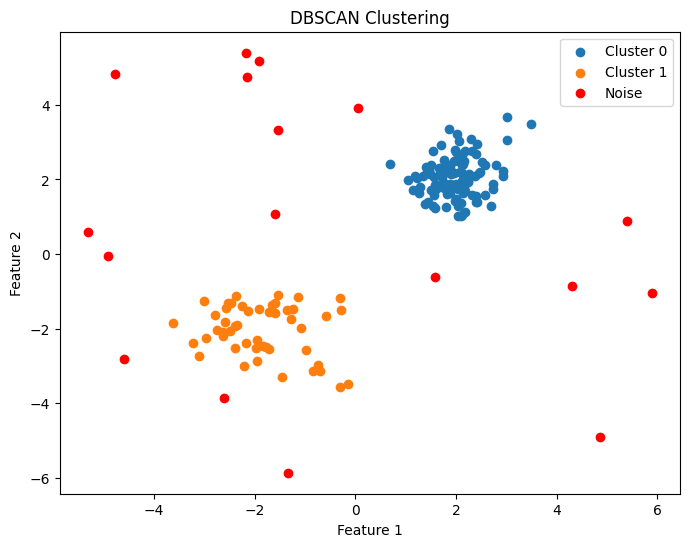

In [8]:
# Generate synthetic data
np.random.seed(42)
dense_cluster = np.random.randn(100, 2) * 0.5 + [2, 2]
sparse_cluster = np.random.randn(50, 2) * 0.8 + [-2, -2]
noise = np.random.uniform(-6, 6, (20, 2))
data = np.vstack([dense_cluster, sparse_cluster, noise])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(data)

# Visualize the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
for label in unique_labels:
    cluster_points = data[labels == label]
    if label == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='red', label='Noise')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **STEP 1: Load Data**
labels_path = "muziek-genre-clustering-24-25/labels_new.csv"
labeled_path = "muziek-genre-clustering-24-25/labeled_df.csv"
unlabeled_path = "muziek-genre-clustering-24-25/unlabeled_df.csv"

# Read datasets
labels_df = pd.read_csv(labels_path)  # Contains filename and genre
labeled_df = pd.read_csv(labeled_path)  # Labeled audio features
unlabeled_df = pd.read_csv(unlabeled_path)  # Unlabeled audio features

# **STEP 2: Merge Labels with Labeled Dataset**
labeled_df = pd.merge(labeled_df, labels_df, on="filename", how="left")

# **STEP 3: Normalize Features**
feature_columns = [col for col in labeled_df.columns if col not in ["filename", "genre", "Unnamed: 0"]]

scaler = StandardScaler()
labeled_df[feature_columns] = scaler.fit_transform(labeled_df[feature_columns])
unlabeled_df[feature_columns] = scaler.transform(unlabeled_df[feature_columns])  # Apply same scaling

# **STEP 4: Determine Best Parameters for DBSCAN (eps & min_samples)**
eps_values = np.arange(0.1, 3.0, 0.1)  # Extended range for eps
min_samples_values = [3, 5, 10]

best_silhouette = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(labeled_df[feature_columns])

        # Ignore models that classify all points as noise (-1)
        if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(labeled_df[feature_columns], labels)
            if score > best_silhouette:
                best_silhouette = score
                best_eps = eps
                best_min_samples = min_samples

# **Fallback: If no valid eps is found, use default values**
if best_eps is None or best_min_samples is None:
    print("⚠️ No optimal DBSCAN parameters found. Using default values (eps=1.0, min_samples=5).")
    best_eps = 1.0
    best_min_samples = 5

print(f"✅ Best DBSCAN Parameters: eps={best_eps}, min_samples={best_min_samples} (Silhouette Score: {best_silhouette:.4f})")

# **STEP 5: Train DBSCAN with Optimal Parameters**
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labeled_df["Cluster"] = dbscan.fit_predict(labeled_df[feature_columns])

# **STEP 6: Map Clusters to Genres (Ignoring Noise -1)**
cluster_genre_mapping = labeled_df[labeled_df["Cluster"] != -1].groupby("Cluster")["genre"].agg(lambda x: x.mode()[0])

# **STEP 7: Predict Clusters for the Unlabeled Dataset**
unlabeled_df["Cluster"] = dbscan.fit_predict(unlabeled_df[feature_columns])

# **Handle Noise Points (-1)**
unlabeled_df["genre"] = unlabeled_df["Cluster"].map(cluster_genre_mapping)
unlabeled_df["genre"].fillna("Unknown", inplace=True)  # Assign "Unknown" to noise points

# **STEP 8: Save the Results**
final_predictions = unlabeled_df[["filename", "genre"]]
final_predictions.to_csv("predicted_genres_dbscan.csv", index=False)

print("✅ DBSCAN clustering completed! The predicted genres have been saved in 'predicted_genres_dbscan.csv'.")


⚠️ No optimal DBSCAN parameters found. Using default values (eps=1.0, min_samples=5).
✅ Best DBSCAN Parameters: eps=1.0, min_samples=5 (Silhouette Score: -1.0000)
✅ DBSCAN clustering completed! The predicted genres have been saved in 'predicted_genres_dbscan.csv'.


C:\Users\Privat\AppData\Local\Temp\ipykernel_18160\2830922285.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unlabeled_df["genre"].fillna("Unknown", inplace=True)  # Assign "Unknown" to noise points
C:\Users\Privat\AppData\Local\Temp\ipykernel_18160\2830922285.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  unlabeled_df["genre"].fillna(

#### Conclusion

DBSCAN is a suitable algorithm for this project because of its ability to identify clusters of arbitrary shapes and handle noise effectively. Unlike centroid-based methods such as K-Means, DBSCAN does not assume spherical clusters and is well-suited for datasets with irregular patterns (Ester et al., 1996). This flexibility is particularly advantageous when clustering musical genres, as the feature space may exhibit overlapping or complex structures.

Moreover, DBSCAN's robustness against noise allows it to exclude outliers from the clustering process, making it effective for detecting unusual or out-of-distribution audio fragments (Pedregosa et al., 2011). However, the algorithm is sensitive to the choice of its parameters ($\varepsilon$ and $\text{minPts}$), which require careful tuning based on the dataset's density distribution.

Despite these challenges, DBSCAN remains a strong candidate for exploratory clustering in this project due to its adaptability and lack of reliance on predefined cluster counts. Future steps should include parameter optimization and comparison with other clustering methods to assess its performance comprehensively.

## 2.3 Gaussian Mixture Models (GMM)

GMM is a soft clustering model that assigns each observation a probability of belonging to a specific cluster. In this algorithm, each cluster is represented by a normal (Gaussian) distribution with the mean and covariance matrix as metrics.

This model utilizes the Expectation-Maximization (EM) method, which is split into the following phases:

- **Initialize phase:**  
  The mean, the covariance matrix, and the mixing coefficients of every Gaussian distribution (cluster) are assumed.

- **Expectation phase:**  
  The observations are assigned to Gaussian distributions (clusters) based on the calculated probability that they belong to them.

- **Maximization phase:**  
  The mean, the covariance matrix, and the mixing coefficients of every Gaussian distribution (cluster) are calculated with the assigned observations. 

The Expectation and Maximization phases are reiterated until the model can no longer be notably improved.

To calculate the probability that an observation belongs to a cluster, the following probability density function (PDF) formula is used (What Is Gaussian Mixture Model | Deepchecks, 2023):

$$
\text{pdf}(x) = \sum_{k=1}^{K} \pi_k \cdot N(x|\mu_k, \Sigma_k)
$$

Where:

- \( \pi_k \) = Mixing coefficient  
- \( \mu_k \) = Mean vector  
- \( \Sigma_k \) = Covariance matrix  
- \( N(x|\mu_k, \Sigma_k) \) = Probability density function


## 2.4 GMM CODE

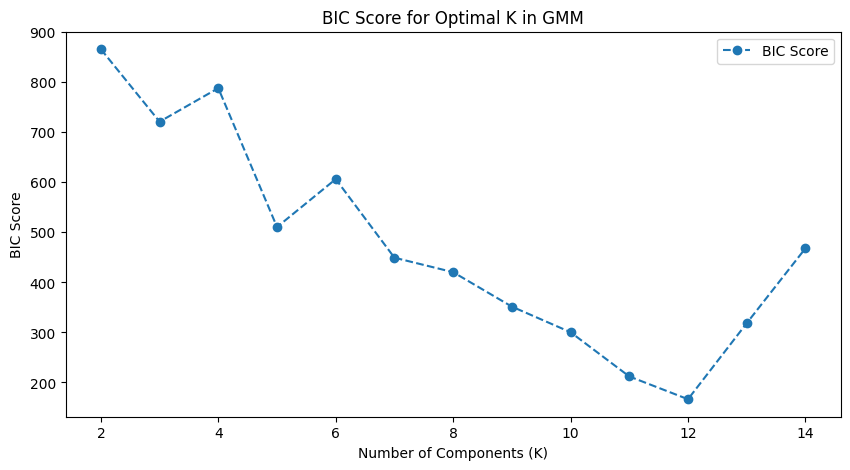

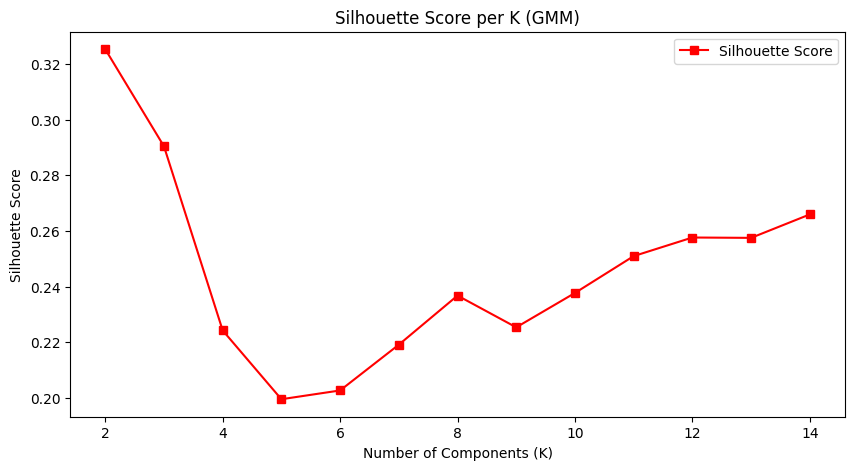

✅ GMM clustering completed! The predicted genres have been saved in 'predicted_genres_gmm.csv'.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **STEP 1: Load Data**
labels_path = "muziek-genre-clustering-24-25/labels_new.csv"
labeled_path = "muziek-genre-clustering-24-25/labeled_df.csv"
unlabeled_path = "muziek-genre-clustering-24-25/unlabeled_df.csv"

# Read datasets
labels_df = pd.read_csv(labels_path)  # Contains filename and genre
labeled_df = pd.read_csv(labeled_path)  # Labeled audio features
unlabeled_df = pd.read_csv(unlabeled_path)  # Unlabeled audio features

# **STEP 2: Merge Labels with Labeled Dataset**
labeled_df = pd.merge(labeled_df, labels_df, on="filename", how="left")

# **STEP 3: Normalize Features**
feature_columns = [col for col in labeled_df.columns if col not in ["filename", "genre", "Unnamed: 0"]]

scaler = StandardScaler()
labeled_df[feature_columns] = scaler.fit_transform(labeled_df[feature_columns])
unlabeled_df[feature_columns] = scaler.transform(unlabeled_df[feature_columns])  # Apply same scaling

# **STEP 4: Determine Optimal Clusters with BIC (GMM Method)**
bic_scores = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type='full')
    gmm.fit(labeled_df[feature_columns])
    bic_scores.append(gmm.bic(labeled_df[feature_columns]))
    labels = gmm.predict(labeled_df[feature_columns])
    silhouette_scores.append(silhouette_score(labeled_df[feature_columns], labels))

# Plot BIC Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, bic_scores, marker='o', linestyle='--', label='BIC Score')
plt.xlabel("Number of Components (K)")
plt.ylabel("BIC Score")
plt.title("BIC Score for Optimal K in GMM")
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-', color='red', label='Silhouette Score')
plt.xlabel("Number of Components (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per K (GMM)")
plt.legend()
plt.show()

# **STEP 5: Train GMM with Optimal K (User-Defined or Best from BIC)**
optimal_k = int(12)  # You can manually choose the best value based on BIC/Silhouette
gmm = GaussianMixture(n_components=optimal_k, random_state=42, covariance_type='full')
labeled_df["Cluster"] = gmm.fit_predict(labeled_df[feature_columns])

# **STEP 6: Map Clusters to Genres**
cluster_genre_mapping = labeled_df.groupby("Cluster")["genre"].agg(lambda x: x.mode()[0])

# **STEP 7: Predict Clusters for the Unlabeled Dataset**
unlabeled_df["Cluster"] = gmm.predict(unlabeled_df[feature_columns])
unlabeled_df["genre"] = unlabeled_df["Cluster"].map(cluster_genre_mapping)

# **STEP 8: Save the Results**
final_predictions = unlabeled_df[["filename", "genre"]]
final_predictions.to_csv("predicted_genres_gmm.csv", index=False)

print("✅ GMM clustering completed! The predicted genres have been saved in 'predicted_genres_gmm.csv'.")

# PCA

## PCA Scatterplot for labeled data:

Explained Variance of PC1: 0.6561223966714446
Explained Variance of PC2: 0.11441024507498936
Total Explained Variance: 0.7705326417464339


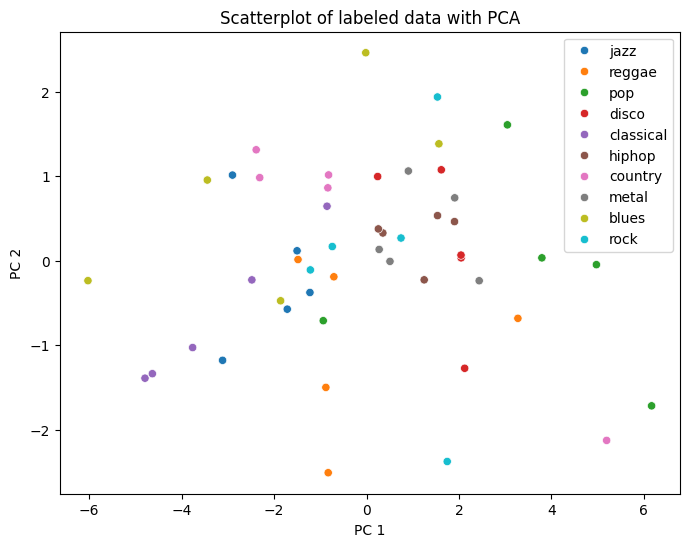

In [7]:
# Payong (2022)

# 2 principal components for scatter plot
n = 2

# PCA
pca = PCA(n_components=n)

pcs = pca.fit_transform(labeled_df[feature_columns])

# explained Variance
explained_variance = pca.explained_variance_ratio_

for i, number in enumerate(explained_variance, start=1):
    print(f"Explained Variance of PC{i}: {number}")

print(f"Total Explained Variance: {sum(explained_variance)}")

# new reduced df
labeled_pca_df = pd.DataFrame(data=pcs, columns=[f'PC{i+1}' for i in range(n)])
labeled_pca_df['genre'] = labeled_df['genre']

# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='genre', data=labeled_pca_df)
plt.title('Scatterplot of labeled data with PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

## PCA Scatterplot for unlabeled data (Best Model):

Explained Variance of PC1: 0.778502198118695
Explained Variance of PC2: 0.07879825164720838
Total Explained Variance: 0.8573004497659034


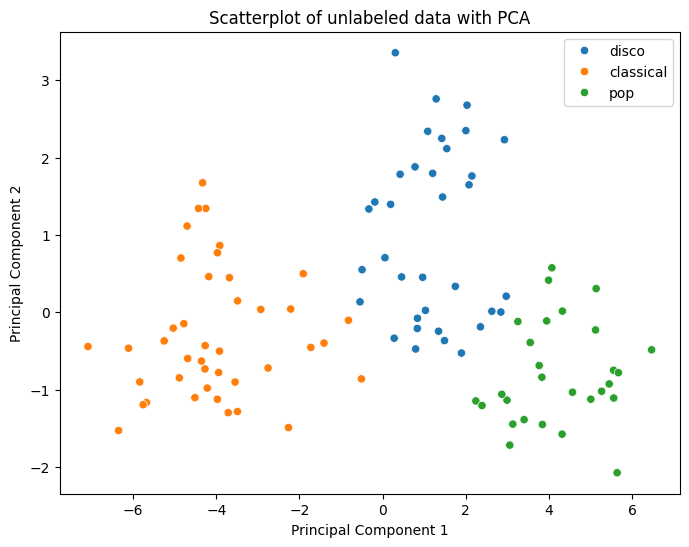

In [8]:
# Payong (2022)

# 2 principal components for scatter plot
n = 2

# PCA
pca = PCA(n_components=n)

pcs = pca.fit_transform(unlabeled_df[feature_columns])

# explained variance
explained_variance = pca.explained_variance_ratio_

for i, number in enumerate(explained_variance, start=1):
    print(f"Explained Variance of PC{i}: {number}")

print(f"Total Explained Variance: {sum(explained_variance)}")

# new reduced df
unlabaleled_pca_df = pd.DataFrame(data=pcs, columns=[f'PC{i+1}' for i in range(n)])
unlabaleled_pca_df['genre'] = unlabeled_df['genre']

# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='genre', data=unlabaleled_pca_df)
plt.title('Scatterplot of unlabeled data with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

## Best Clustering Model with PCA:

We find the optimal number of Principal Components for PCA for the labeled data:

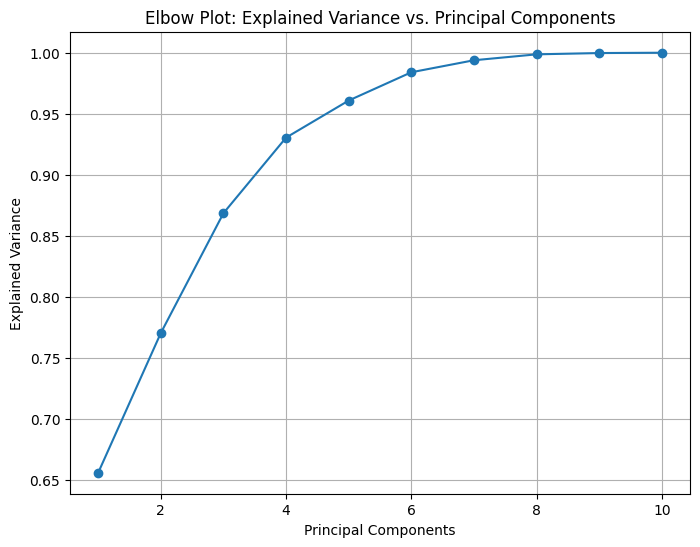

In [9]:
# Payong (2022)

# PCA
pca = PCA()
pcs = pca.fit_transform(labeled_df[feature_columns])

# explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance_sum = np.cumsum(explained_variance)

# elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_sum) + 1), explained_variance_sum, marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.title("Elbow Plot: Explained Variance vs. Principal Components")
plt.grid()
plt.show()


4 principal compenents are chosen, because the elbow is there and they have a high explained variance.

We reduce the features with PCA to the selected number of Principal Components:

In [10]:
# Payong (2022)

# number of pcs
n = 4

# PCA
pca = PCA(n_components=n)
pcs = pca.fit_transform(labeled_df[feature_columns])

# new reduced df
best_labeled_pca_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(n)])
best_labeled_pca_df["genre"] = labeled_df["genre"]


We train the best model () with the reduced labeled data:

We apply PCA to the unlabeled data:

We run the best model () on the reduced unlabeled data:

# NMF

## NMF Scatterplot for labeled data:

Reconstruction Error: 0.017031567750733684


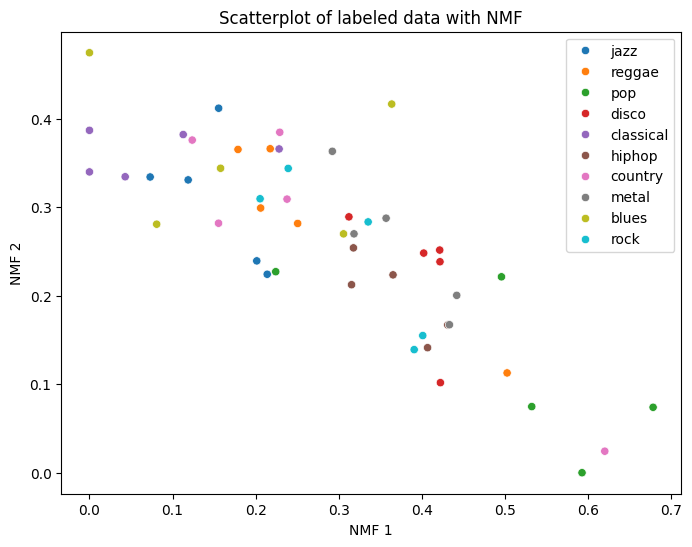

In [17]:
# C (2023)
# NMF (o. D.)
# Zhang (2024)

from sklearn.preprocessing import MinMaxScaler

# 2 features for scatter plot
n = 2

# normalize, because NMF requires non-negative data
MinMaxScaler = MinMaxScaler()
labeled_df[feature_columns] = MinMaxScaler.fit_transform(labeled_df[feature_columns])

# NMF
nmf = NMF(n_components=n)
features  = nmf.fit_transform(labeled_df[feature_columns])

# reconstruction error
reconstruction = nmf.inverse_transform(features)
reconstruction_error = ((labeled_df[feature_columns] - reconstruction) ** 2).mean().mean()

print(f"Reconstruction Error: {reconstruction_error}")

# new reduced df
labeled_nmf_df = pd.DataFrame(data=features, columns=[f'NMF{i+1}' for i in range(n)])
labeled_nmf_df['genre'] = labeled_df['genre']

# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NMF1', y='NMF2', hue='genre', data=labeled_nmf_df)
plt.title('Scatterplot of labeled data with NMF')
plt.xlabel('NMF 1')
plt.ylabel('NMF 2')
plt.legend(loc='best')
plt.show()

## NMF Scatterplot for unlabeled data (Best Model):

Reconstruction Error: 0.013951250680461297


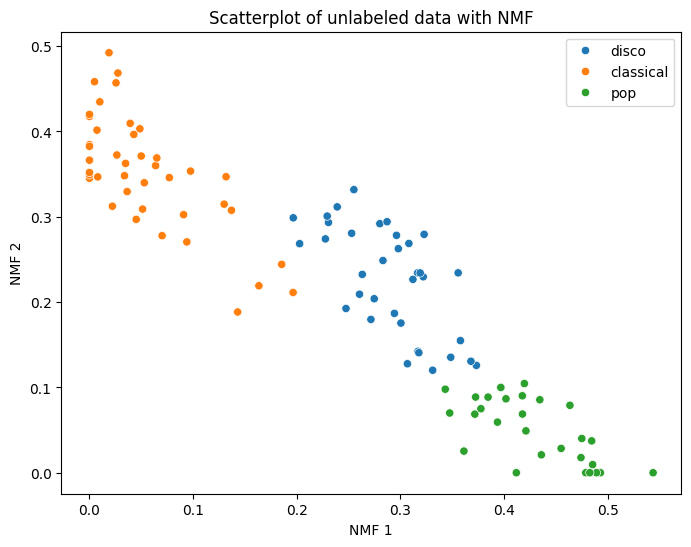

In [18]:
# C (2023)
# NMF (o. D.)
# Zhang (2024)

from sklearn.preprocessing import MinMaxScaler

# 2 features for scatter plot
n = 2

# normalize, because NMF requires non-negative data
MinMaxScaler = MinMaxScaler()
unlabeled_df[feature_columns] = MinMaxScaler.fit_transform(unlabeled_df[feature_columns])

# NMF
nmf = NMF(n_components=n)
features  = nmf.fit_transform(unlabeled_df[feature_columns])

# reconstruction error
reconstruction = nmf.inverse_transform(features)
reconstruction_error = ((unlabeled_df[feature_columns] - reconstruction) ** 2).mean().mean()

print(f"Reconstruction Error: {reconstruction_error}")

# new reduced df
unlabeled_nmf_df = pd.DataFrame(data=features, columns=[f'NMF{i+1}' for i in range(n)])
unlabeled_nmf_df['genre'] = unlabeled_df['genre']

# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NMF1', y='NMF2', hue='genre', data=unlabeled_nmf_df)
plt.title('Scatterplot of unlabeled data with NMF')
plt.xlabel('NMF 1')
plt.ylabel('NMF 2')
plt.legend(loc='best')
plt.show()

## Best Clustering Model with NMF:

We find the optimal number of features for NMF for the labeled data:

c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf

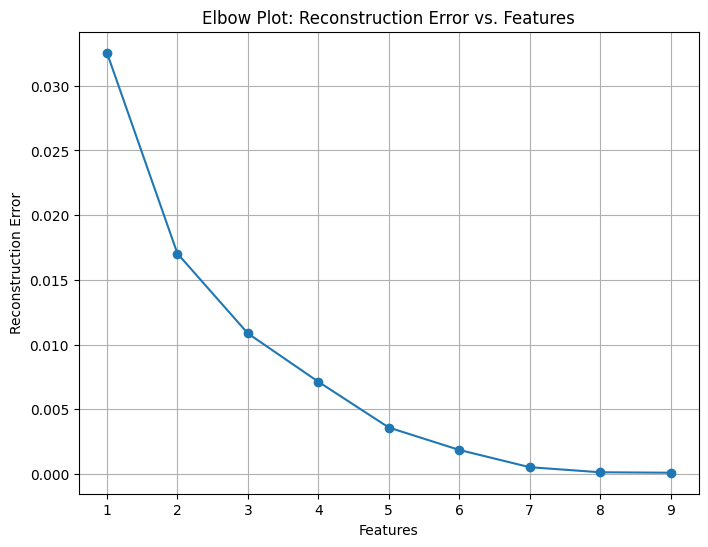

In [19]:
# C (2023)
# NMF (o. D.)
# Zhang (2024)

from sklearn.preprocessing import MinMaxScaler

# range for testing number of features
range_ = range(1, 10)
reconstruction_errors = []

# normalize, because NMF requires non-negative data
MinMaxScaler = MinMaxScaler()
labeled_df[feature_columns] = MinMaxScaler.fit_transform(labeled_df[feature_columns])

for i in range_:
    
    #NMF
    nmf = NMF(n_components=i)
    features = nmf.fit_transform(labeled_df[feature_columns])

    # reconstruction error
    reconstruction = nmf.inverse_transform(features)
    reconstruction_error = ((labeled_df[feature_columns] - reconstruction) ** 2).mean().mean()
    reconstruction_errors.append(reconstruction_error)

# elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range_, reconstruction_errors, marker='o')
plt.xlabel("Features")
plt.ylabel("Reconstruction Error")
plt.title("Elbow Plot: Reconstruction Error vs. Features")
plt.grid()
plt.show()


5 principal compenents are chosen, because the elbow is there.

We reduce the features with NMF to the selected number of features:

In [20]:
# C (2023)

# number of features
n = 5

# NMF
nmf = NMF(n_components=n)
features = nmf.fit_transform(labeled_df[feature_columns])

# new reduced df
best_labeled_nmf_df = pd.DataFrame(features, columns=[f'NMF{i+1}' for i in range(n)])
best_labeled_nmf_df["genre"] = labeled_df["genre"]

c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


We train the best model () with the reduced labeled data:

We apply NMF to the unlabeled data:

We run the best model () on the reduced unlabeled data:

# Recommendation App

In [21]:
# Discovering Interpretable Features - Non-negative Matrix Factorization (NMF) (o. D.)
# Output Widgets: Leveraging Jupyter’s Display System — Jupyter Widgets 8.1.5 Documentation (o. D.)
# Widget List — Jupyter Widgets 8.1.5 Documentation (o. D.)

# normalize
norm_labeled_features = normalize(labeled_nmf_df.drop(columns=['genre']))
norm_unlabeled_features = normalize(unlabeled_nmf_df.drop(columns=['genre']))

df_labeled = pd.DataFrame(norm_labeled_features, columns=['NMF1', 'NMF2'])
df_labeled.index = labeled_df['filename']
df_unlabeled = pd.DataFrame(norm_unlabeled_features, columns=['NMF1', 'NMF2'])
df_unlabeled.index = unlabeled_df['filename']
df_both = pd.concat([df_labeled, df_unlabeled])

# output fro app
output = widgets.Output()

# recommendation function
def recommend_songs(song, top_n=5):

    # output
    with output:

        # clear output
        clear_output(wait=True)

        # features of selected song
        features = df_both.loc[song].values.reshape(1, -1)

        # cosine similaritys
        similaritys = cosine_similarity(df_both, features).flatten()
        similaritys_df = pd.DataFrame({'filename': df_both.index, 'similarity': similaritys})

        # recommended songs
        recommendations_df = similaritys_df[similaritys_df['filename'] != song]
        recommendations_df = recommendations_df.nlargest(top_n, 'similarity')
        print(f"If you like {song}, you should also try these songs:")
        display(recommendations_df)

music_recommendation_app = widgets.HTML(
    value="<h1>Music Recommendation App</h1>"
)

# dropdown
dropdown = widgets.Dropdown(
    options=df_both.index.tolist(),
    description='Select a song:',
    disabled=False,
)

# button
button = widgets.Button(
    description="Give me Recommendations!",
    button_style='primary',
    layout=widgets.Layout(width='300px')
)

# button onClick 
def on_button_click(b):
    recommend_songs(dropdown.value)
button.on_click(on_button_click)

display(music_recommendation_app, dropdown, button, output)

HTML(value='<h1>Music Recommendation App</h1>')

Dropdown(description='Select a song:', options=('m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm0009…

Button(button_style='primary', description='Give me Recommendations!', layout=Layout(width='300px'), style=But…

Output()

<div style="background-color: #0000FF; color: white; padding: 10px; border-radius: 5px;">
  <h1>3 Findings and Conclusion</h1>
</div>

## 3.1

<div style="background-color: #0000FF; color: white; padding: 10px; border-radius: 5px;">
  <h1>4 Reference List</h1>
</div>

## 4.1

### Online Sources

* ChatGPT, 2024, Prompt 1: "welke geluidsfeatures zijn er voor clustering van geluidsfragmenten", (https://chatgpt.com/share/677ee38d-fb54-8001-a50a-9856d52e22c9)

* ChatGPT, 2024, Prompt 2: "geef per feature aan welke library ik daarvoor kan gebruiken", (https://chatgpt.com/share/677ee38d-fb54-8001-a50a-9856d52e22c9)

* ChatGPT, 2024, Prompt 3: "laat voorbeeld code zien hoe deze features worden toegepast op een geluidsfragment, en vervolgens in een df wordt gezet", (https://chatgpt.com/share/677ee38d-fb54-8001-a50a-9856d52e22c9)
* ChatGPT, 2024, Prompt 4: "hoe pas ik oop toe op deze code", (https://chatgpt.com/share/677ee38d-fb54-8001-a50a-9856d52e22c9)

- C, B. P. (2023, 21. Februar). Topic Modeling Tutorial – How to Use SVD and NMF in Python. freeCodeCamp.org. https://www.freecodecamp.org/news/advanced-topic-modeling-how-to-use-svd-nmf-in-python/

- Deepchecks. (2023, January 23). *What is Gaussian Mixture Model.*  
  [https://www.deepchecks.com/glossary/gaussian-mixture-model](https://www.deepchecks.com/glossary/gaussian-mixture-model/)

- Discovering Interpretable Features - Non-negative matrix factorization (NMF). (o. D.). DataCamp. https://campus.datacamp.com/courses/unsupervised-learning-in-python/discovering-interpretable-features

- GeeksforGeeks. (2024, June 26). *Mel-frequency Cepstral Coefficients (MFCC) for Speech Recognition.*  
  [https://www.geeksforgeeks.org/mel-frequency-cepstral-coefficients-mfcc-for-speech-recognition](https://www.geeksforgeeks.org/mel-frequency-cepstral-coefficients-mfcc-for-speech-recognition/)

- NMF. (o. D.-c). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

- Output widgets: leveraging Jupyter’s display system — Jupyter Widgets 8.1.5 documentation. (o. D.). https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html

- Payong, A. (2022, 10. Mai). Dimensionality Reduction: Feature Extraction using Scikit-learn in Python - The Python Code. https://thepythoncode.com/article/dimensionality-reduction-using-feature-extraction-sklearn

- Widget List — Jupyter Widgets 8.1.5 documentation. (o. D.). https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

- Wikipedia contributors. (n.d.-a). Chroma feature. In *Wikipedia*. Retrieved January 12, 2025, from  
   [https://en.wikipedia.org/wiki/Chroma_feature](https://en.wikipedia.org/wiki/Chroma_feature)

-  Wikipedia contributors. (n.d.-b). Tempo. In *Wikipedia*. Retrieved January 12, 2025, from  
   [https://en.wikipedia.org/wiki/Tempo](https://en.wikipedia.org/wiki/Tempo)

- Zhang, R. (2024, 16. Januar). Matrix Decomposition Series: 7 — Matrix Reconstruction and Loss Functions. Medium. https://rendazhang.medium.com/matrix-decomposition-series-7-matrix-reconstruction-and-loss-functions-f25fbe13d424


### Literature

- Ester, M., Kriegel, H.-P., Sander, J., & Xu, X. (1996). A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise. *Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining (KDD)*, 226–231.  
  Retrieved from [https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

- Gouyon, F., Herrera, P., Cano, P., Bonada, J., Llobet, A., & Hackbarth, K. (2006). Is tempo the carrier of common perceptual properties for music? *Speech Communication*, 48(11), 1306–1316.

- Müller, M. (2015). *Fundamentals of Music Processing: Audio, Analysis, Algorithms, Applications*. Springer Verlag.  
  This comprehensive textbook covers key topics in music information retrieval, including chroma features and tempo analysis.

- Peeters, G. (2004). A large set of audio features for sound description (similarity and classification) in the CUIDADO project. *IRCAM Technical Report*.

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830.  
  Retrieved from [https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html)

- Tzanetakis, G., & Cook, P. (2002). Musical genre classification of audio signals. *IEEE Transactions on Speech and Audio Processing*, 10(5), 293–302.  
  DOI: [10.1109/TSA.2002.800560](https://doi.org/10.1109/TSA.2002.800560)


### Yet to be documented sources

- [K-means clustering - Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)